In [1]:
from pylab import *
import seaborn as sns

%matplotlib inline

In [2]:
sns.set()
rcParams['figure.figsize'] = (12, 8)

sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context("poster")

In [3]:
N = int(1e6)
z = rand(N)**(-3.0 + 1) # power law distribution
z = sort(z)

In [4]:
cdf = arange(1, N+1) / float(N)

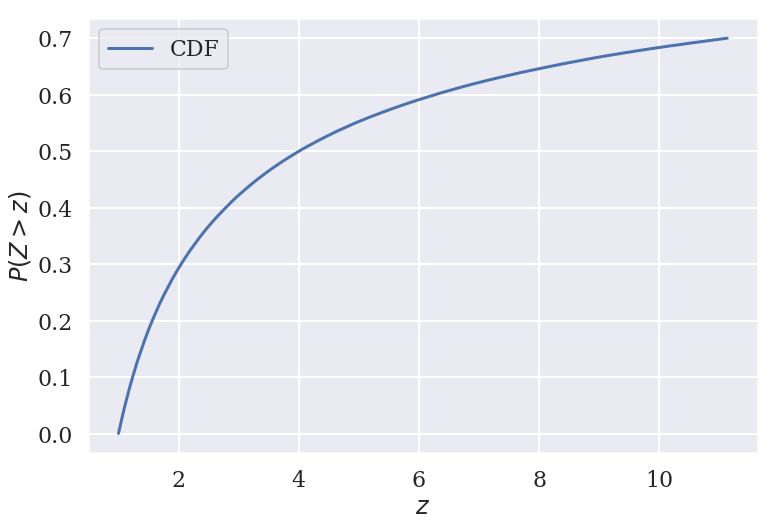

In [5]:
cutoff = int(7e5)
plot(z[:cutoff], cdf[:cutoff], label="CDF")

legend()
xlabel(r"$z$")
ylabel(r"$P(Z > z)$")

show()

In [6]:
fz = diff(cdf) / diff(z)
alpha, log_k = polyfit(log(z[1:]), log(fz), 1)

k = exp(log_k)
pdf = k*z**alpha

print("k = {}, alpha = {}".format(k, alpha))

k = 0.890801903964, alpha = -1.50055977144


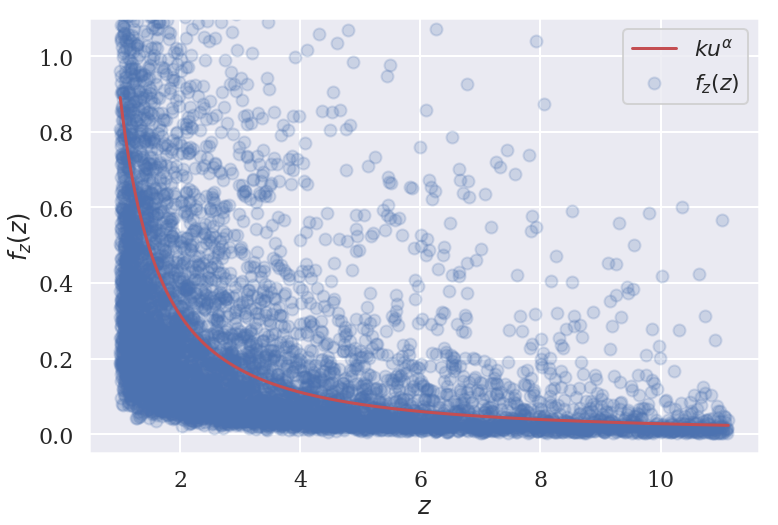

In [7]:
scatter(z[:cutoff:100], fz[:cutoff:100], alpha=0.2, label="$f_z(z)$")
plot(z[:cutoff], pdf[:cutoff], 'r-', label=r"$k u^{\alpha}$")

ylim(-0.05, 1.1)

legend()
xlabel(r"$z$")
ylabel(r"$f_z(z)$")
show()

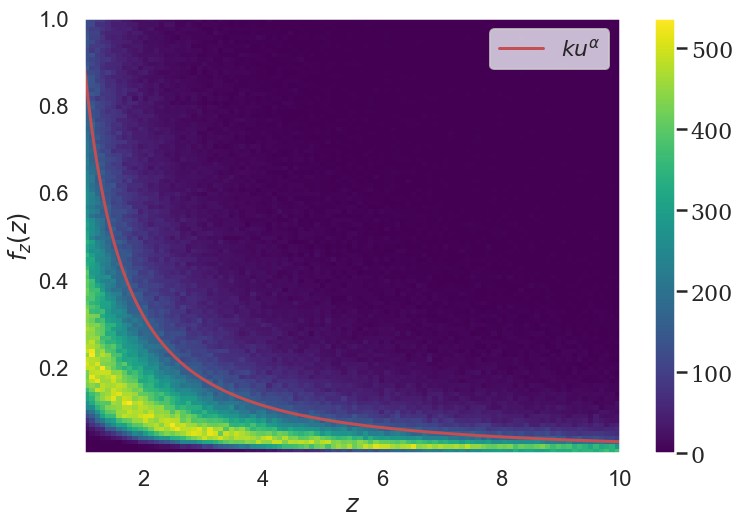

In [8]:
tmp_z = z[1:]

tmp_fz = fz[fz < 1.0]
tmp_z = tmp_z[fz < 1.0]

tmp_fz = tmp_fz[tmp_z < 10.0]
tmp_z = tmp_z[tmp_z < 10.0]

with sns.axes_style("dark"):
    plot(z[:cutoff], pdf[:cutoff], 'r-', label=r"$k u^{\alpha}$")
    hist2d(tmp_z, tmp_fz, (100, 100), cmap=cm.viridis)
    
legend()
xlabel(r"$z$")
ylabel(r"$f_z(z)$")
colorbar()
show()